Epoch 1/5 done
Epoch 2/5 done
Epoch 3/5 done
Epoch 4/5 done
Epoch 5/5 done


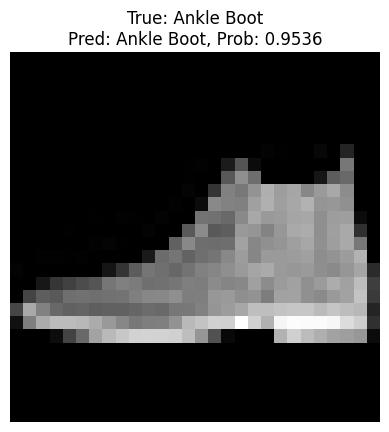

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

# 1️⃣ Hyperparameters
input_size = 28*28
hidden_size = 256
output_size = 10
batch_size = 64
epochs = 5
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# 2️⃣ Dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_dataset = datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
val_dataset = datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)

# 3️⃣ Model
class MLP(nn.Module):
    def __init__(self): 
        super().__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, output_size)
    def forward(self, x):
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        return self.fc3(x)

model = MLP().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn = nn.CrossEntropyLoss()
classes = ('T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
           'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot')

# 4️⃣ Training loop
for epoch in range(epochs):
    model.train()
    for X, y in train_loader:
        X, y = X.to(device), y.to(device)
        optimizer.zero_grad()
        loss = loss_fn(model(X), y)
        loss.backward()
        optimizer.step()
    print(f'Epoch {epoch+1}/{epochs} done')

# 5️⃣ Inference on first validation image
model.eval()
images, labels = next(iter(val_loader))
img = images[0].unsqueeze(0).to(device)
with torch.no_grad():
    logits = model(img)
    probs = torch.softmax(logits, dim=1)
    pred_idx = torch.argmax(probs, dim=1).item()
true_idx = labels[0].item()

# 6️⃣ Display
plt.imshow(images[0].squeeze(), cmap='gray')
plt.title(f"True: {classes[true_idx]}\nPred: {classes[pred_idx]}, Prob: {probs[0, pred_idx]:.4f}")
plt.axis('off')
plt.show()


In [4]:
images[0].shape, images[0].squeeze().shape

(torch.Size([1, 28, 28]), torch.Size([28, 28]))